---
# **1 - Handsimulation**
---

---
## **1.1 - Minimax-Bewertungen**

Geben Sie für den Spielbaum die Minimax-Bewertungen an.

$$ \\ $$

---

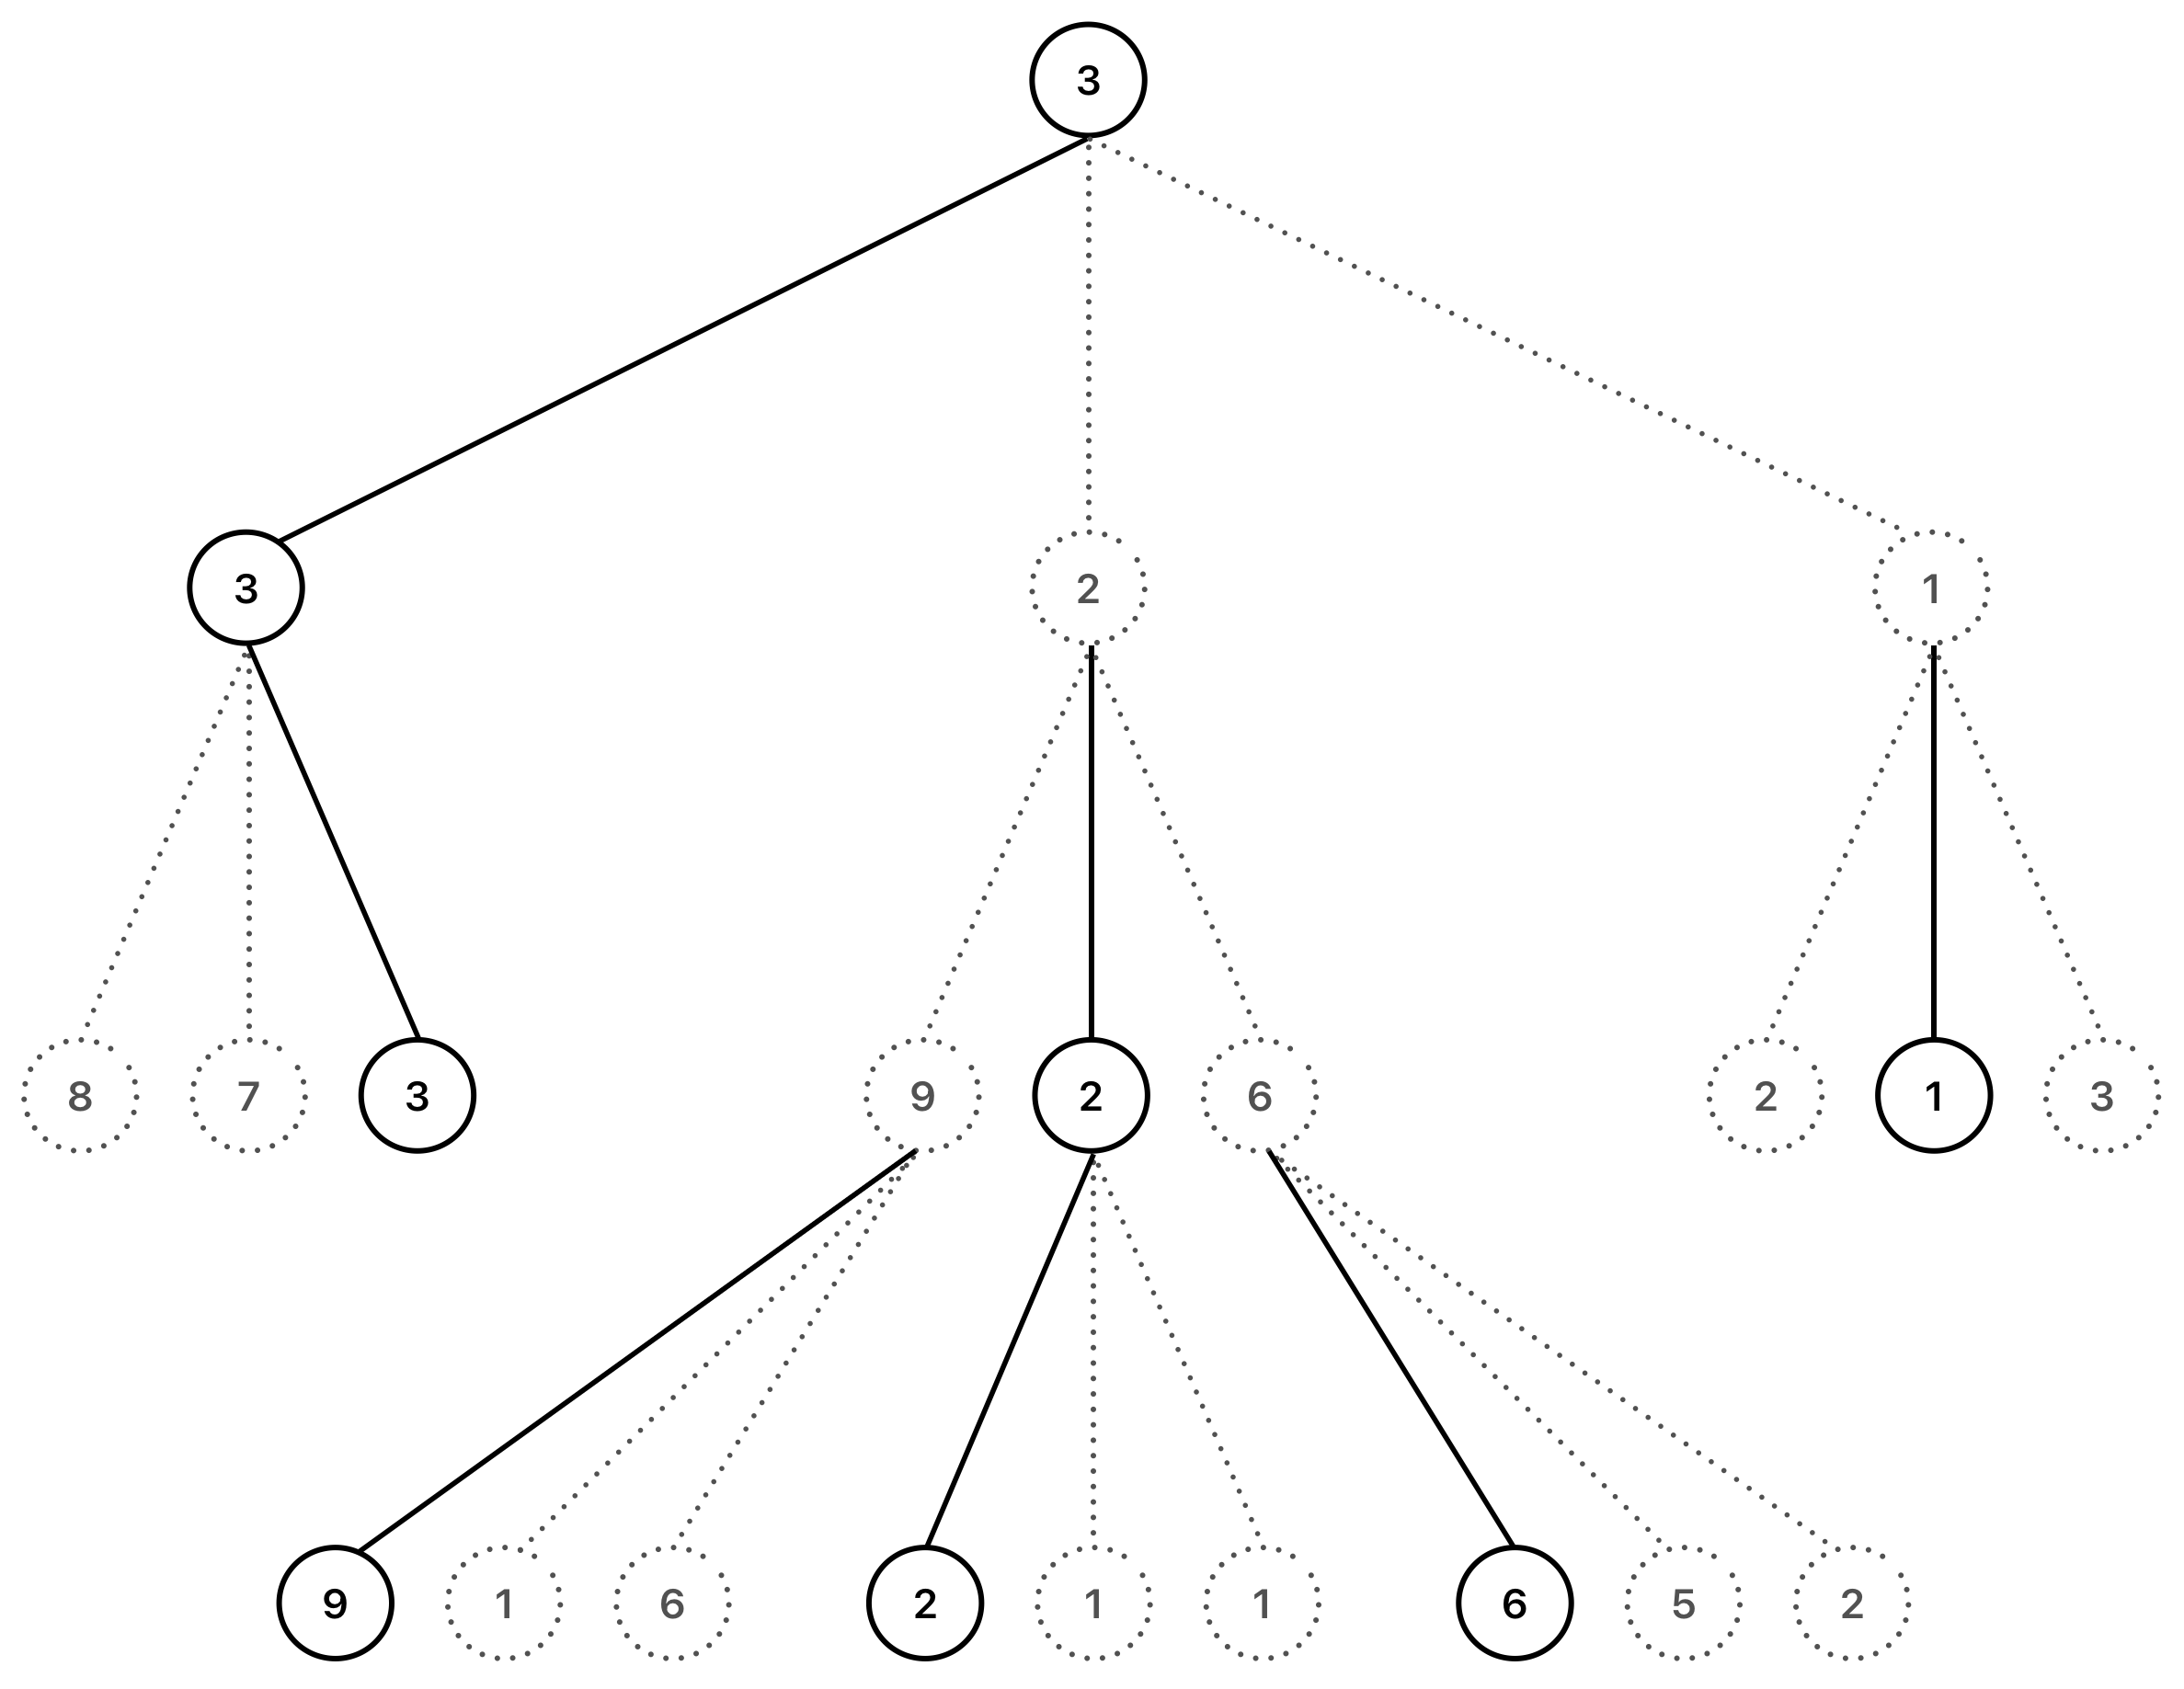


---
## **1.2 - Pruning**

Markieren Sie die Kanten, die bei alpha-beta-Pruning nicht mehr untersucht werden würden, d.h. wo Pruning stattfinden würde. Geben Sie für jeden Knoten die (sich ändernden)
α- und β-Werte an.

$$ \\ $$

---

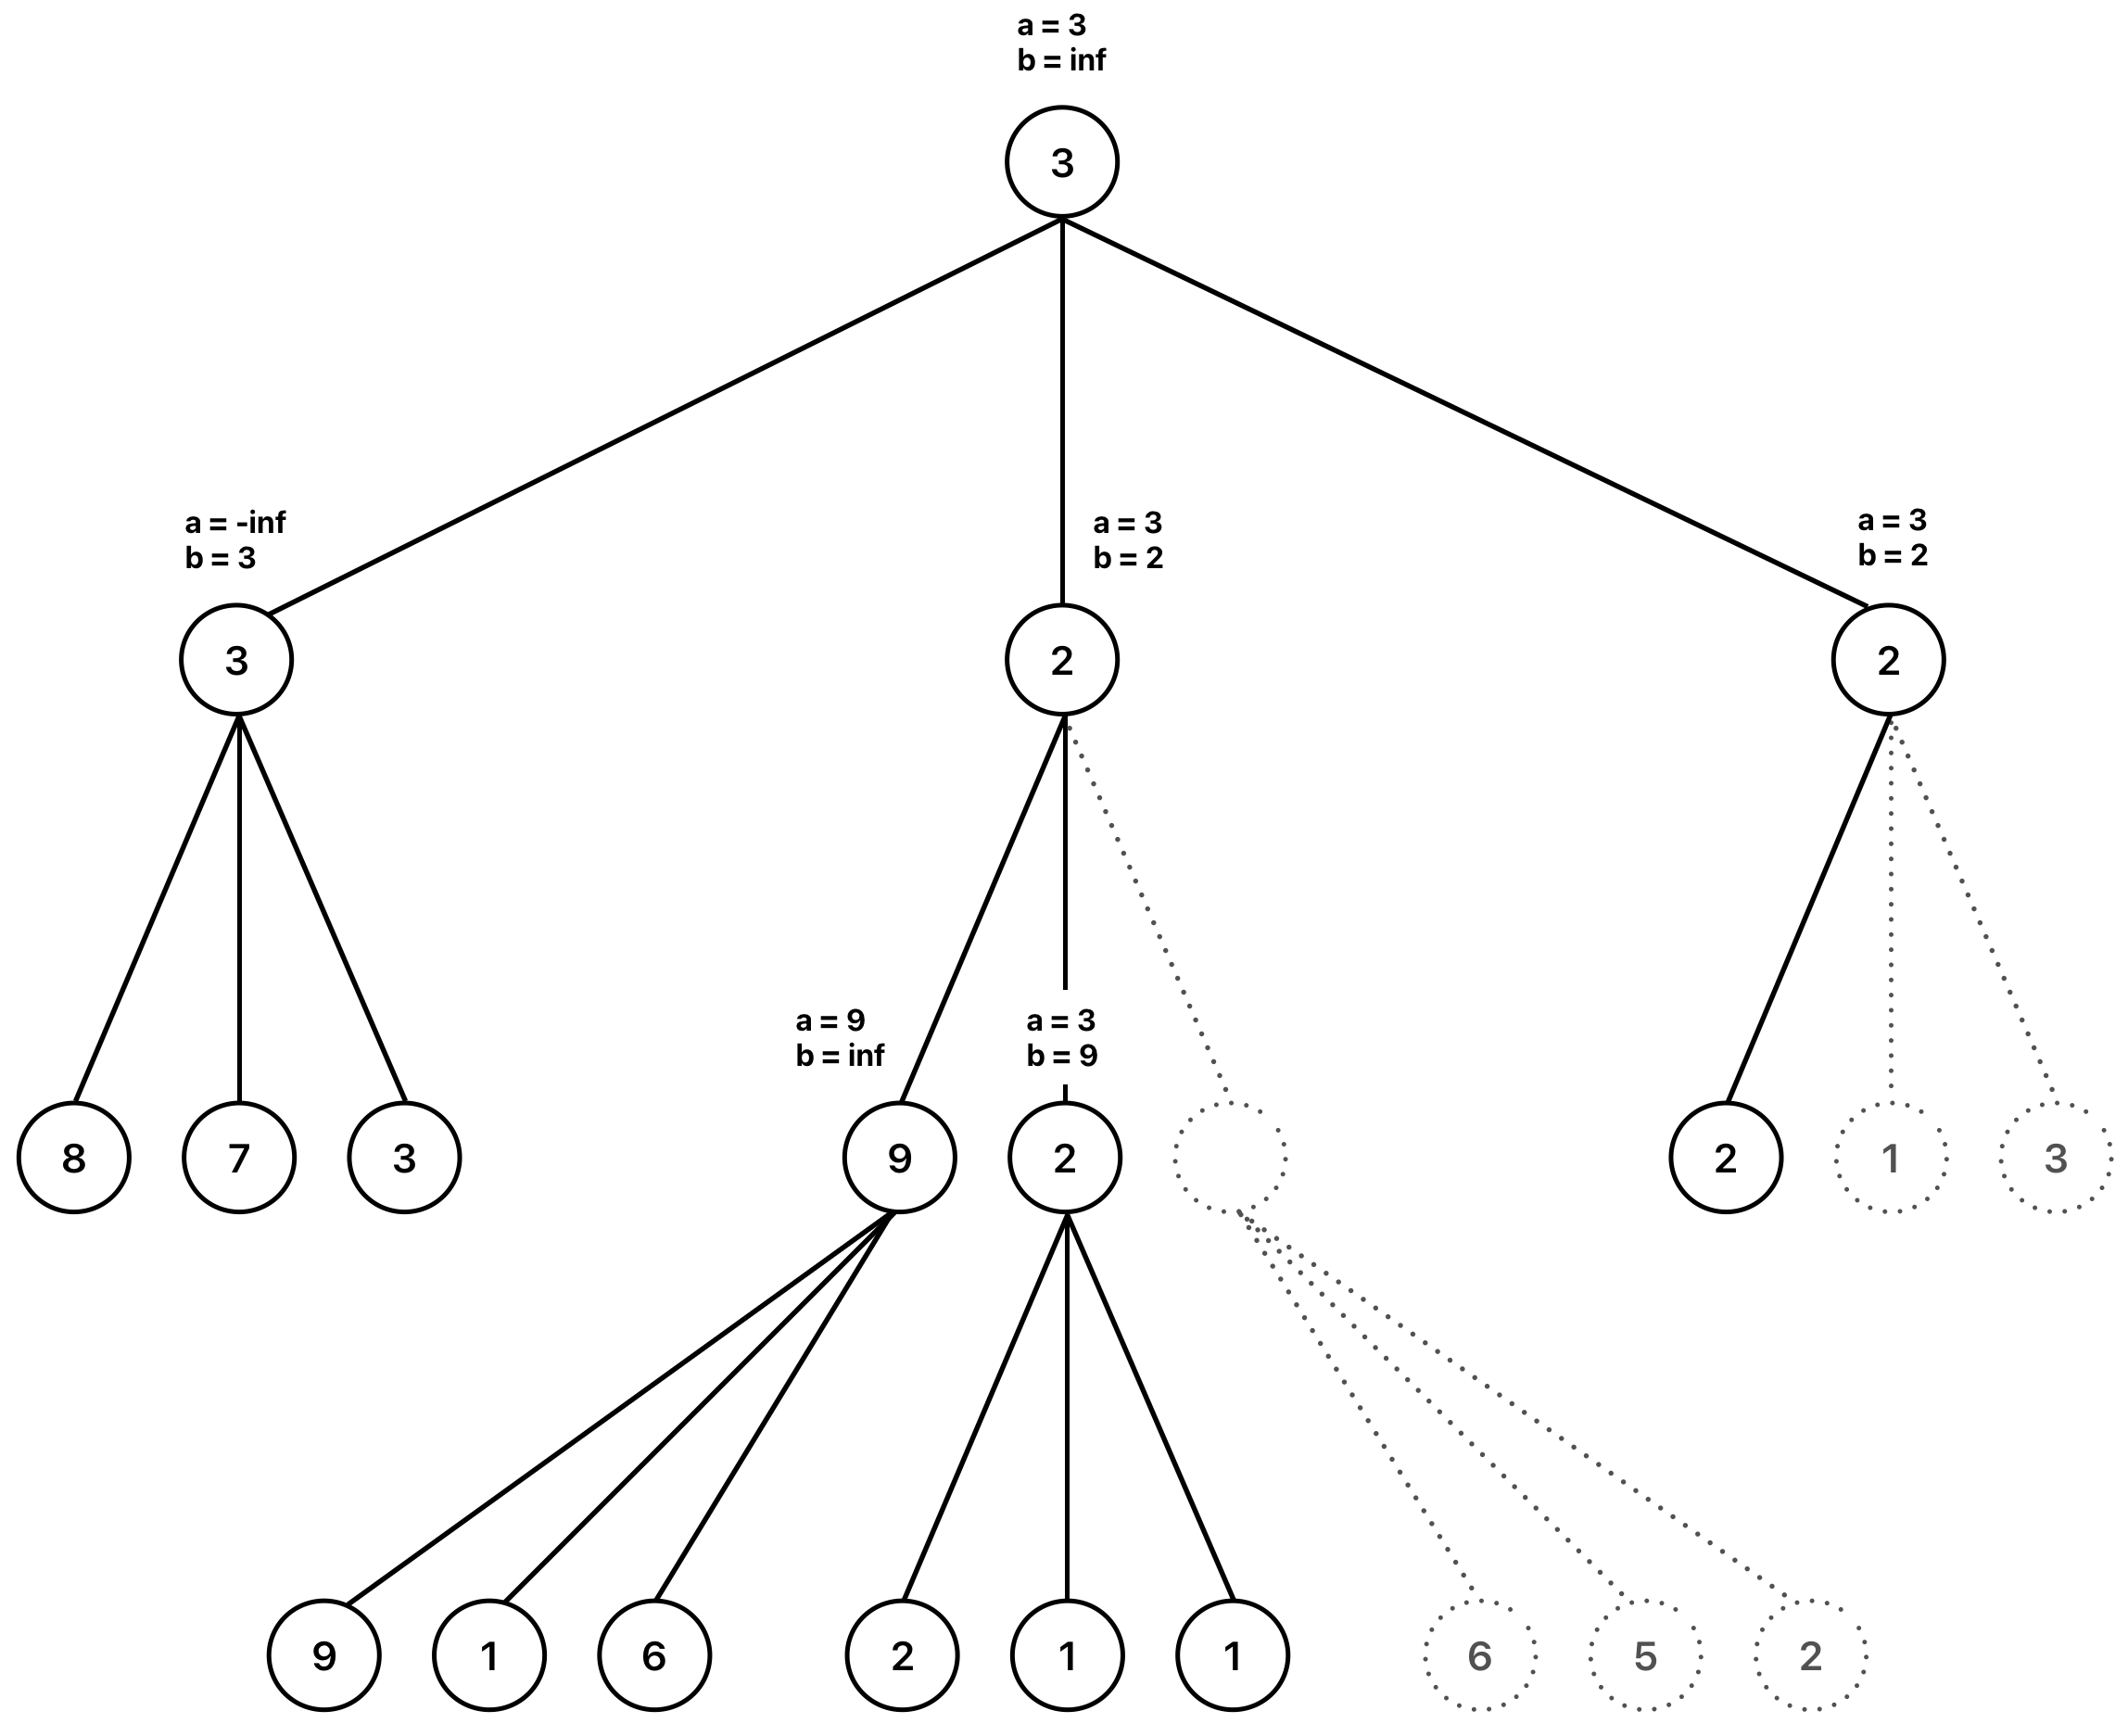

---

## **1.3 - Optimale Ordnung**

Können die Knoten derart geordnet werden, dass alpha-beta-Pruning eine größere Anzahl von Zweigen abschneidet? Wenn ja, geben Sie eine solche Ordnung an. Wenn nein, begründen Sie Ihre Antwort.

$$ \\ $$

---



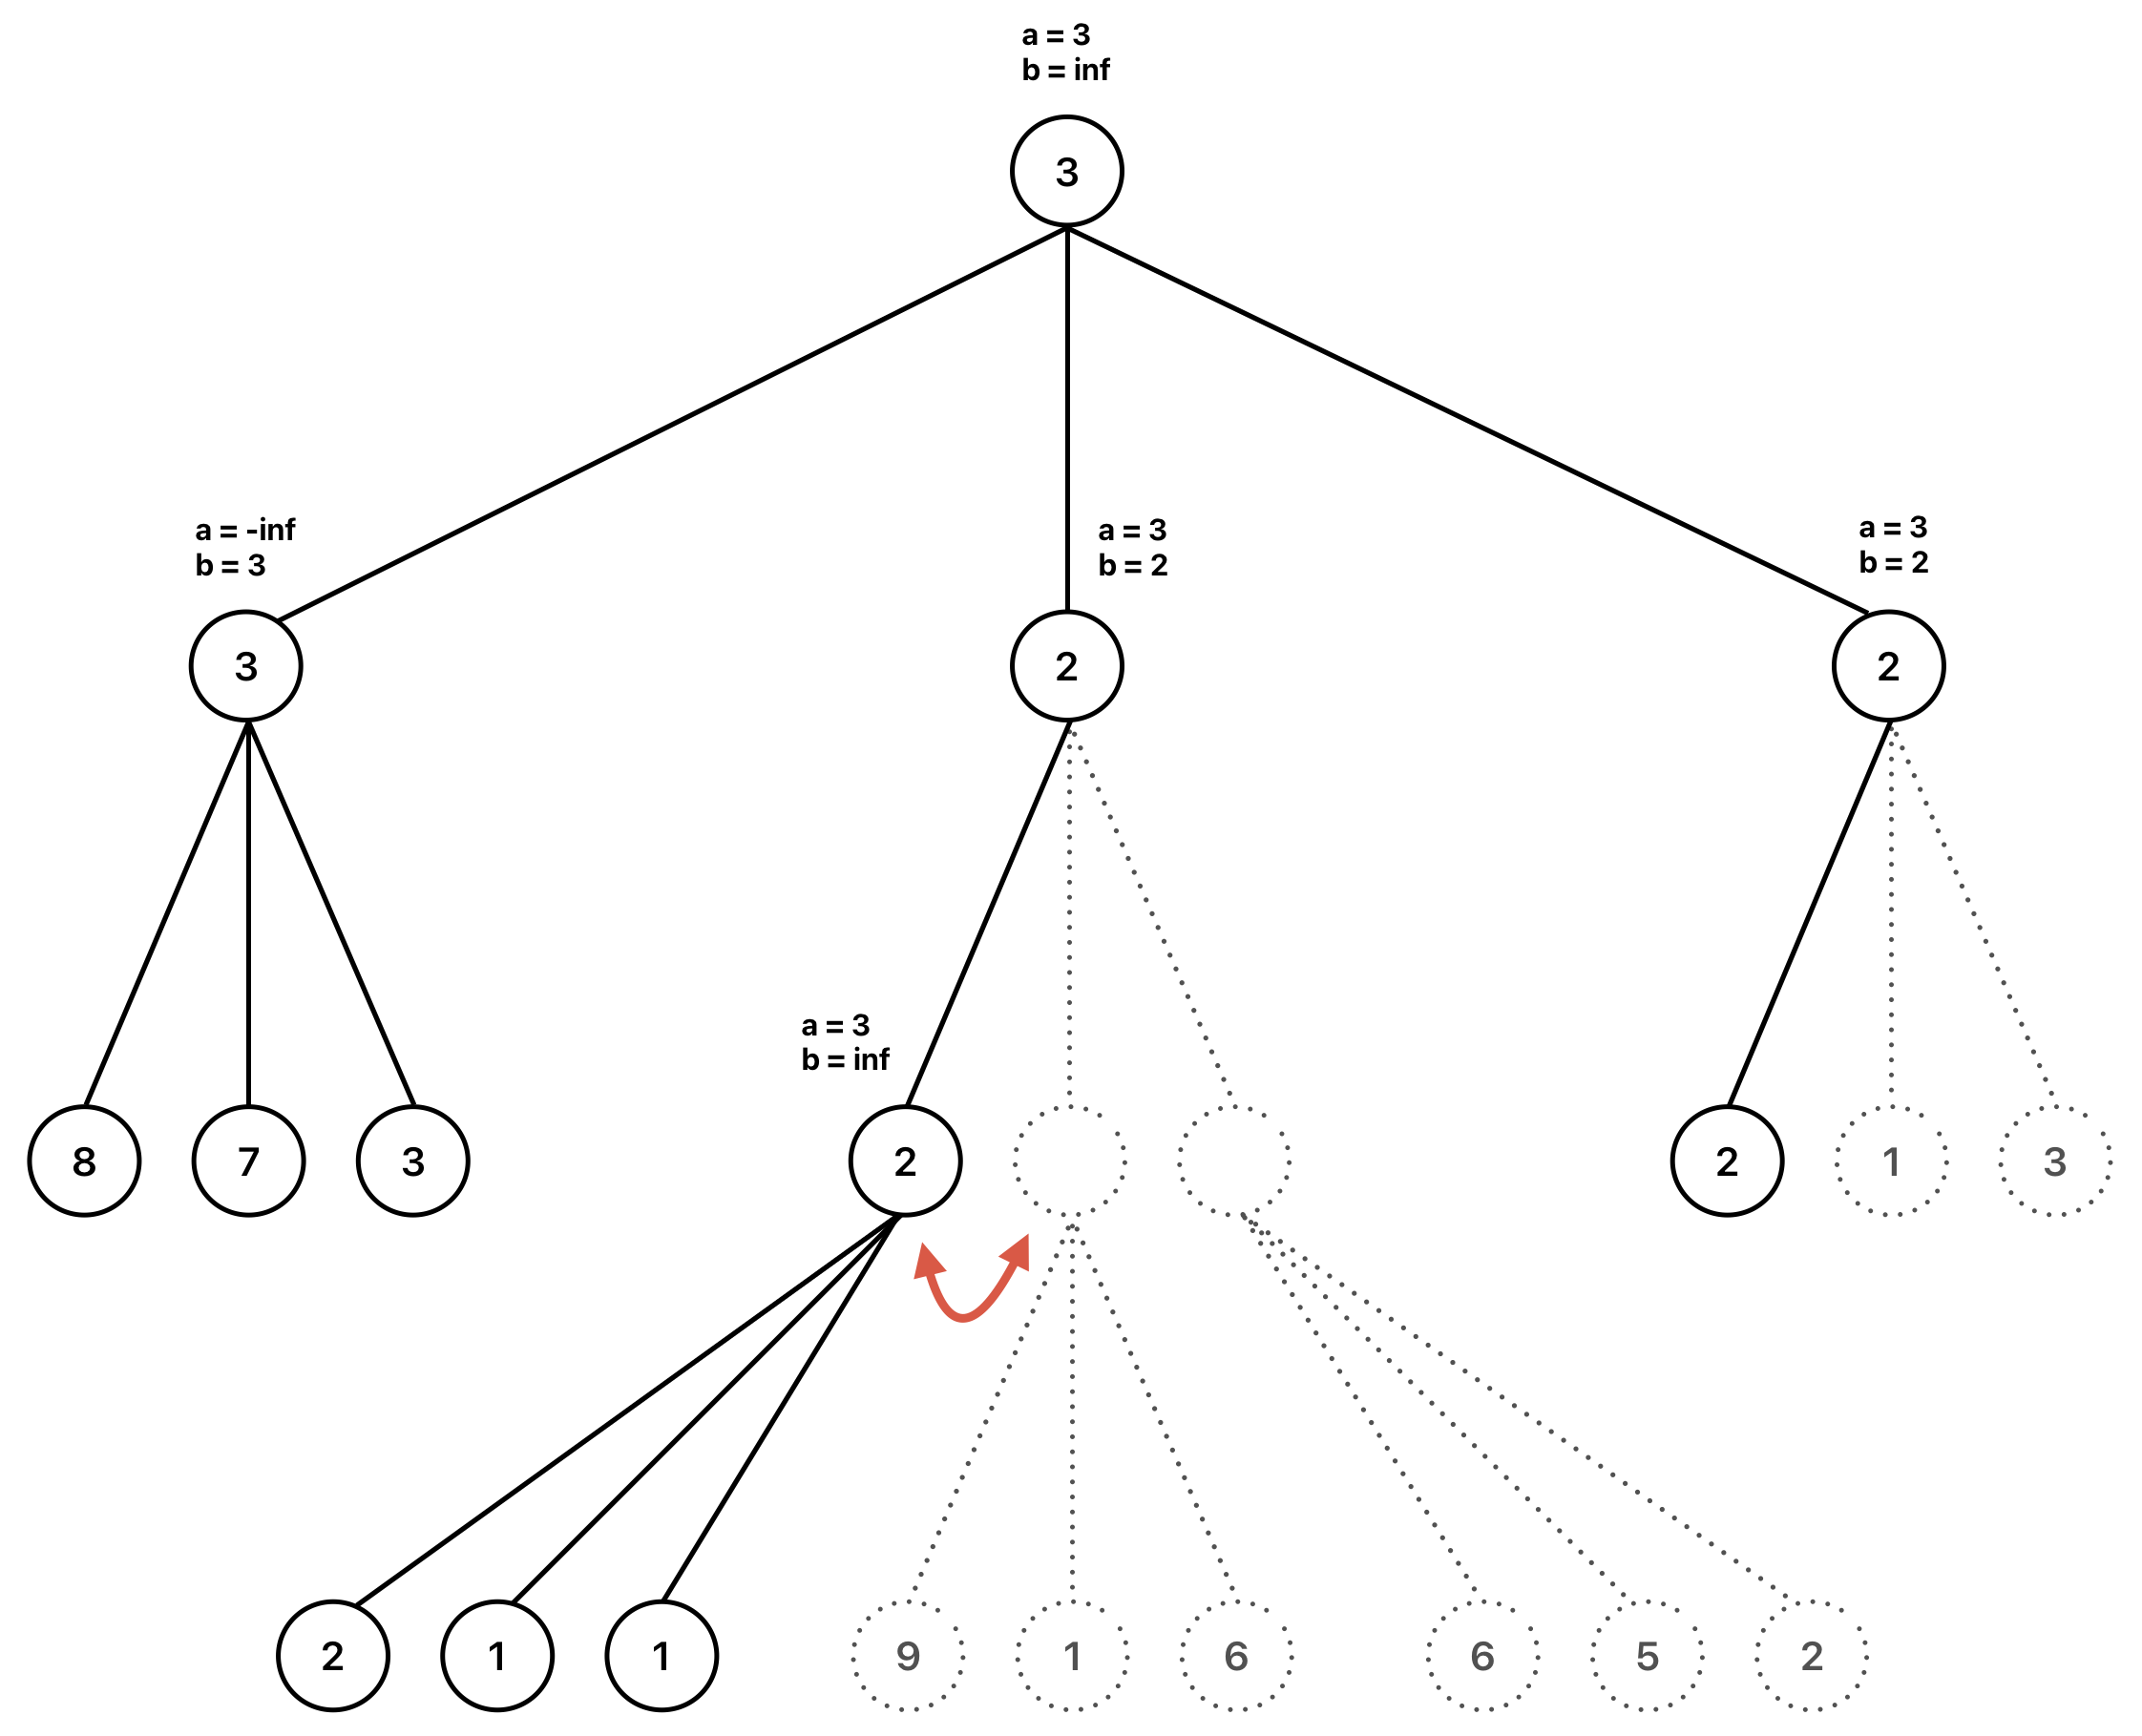

----
# **2 - Implementierung**
---

In [162]:
import copy


class Node:
  def __init__(self, value, childs=[]):
    self.childs = childs
    self.value = value

  def move(self, pos):
    i, j = pos
    c_board = copy.deepcopy(self.value)
    c_board[i*3 + j] = to_move(c_board)

    for child in self.childs:
      if (child.value == c_board):
        return child


def action(before, after):
  for i in range(0,3):
    for j in range(0,3):
      if (before[i*3 + j] != after[i*3 + j]):
        return (i, j)


def to_move(board):
  if (board.count(1) > board.count(-1)):
    return -1
  else:
    return +1


def print_board(board):
  player_signs = {
    +1: 'X',
    -1: 'O',
    0: ' '
  }

  for r in range(0,3):
    row = [ player_signs[board[r*3 + c]] for c in range(0,3) ]
    print(' | '.join(row))

    if r < 2:
     print('-' * 9)
  print()


def is_terminal(board):
  # hat jemand gewonnen?
  for i in range(0,3):
    if abs(board[i*3 + 0] + board[i*3 + 1] + board[i*3 + 2]) == 3:
      return -to_move(board)

  for i in range(0,3):
    if abs(board[0*3 + i] + board[1*3 + i] + board[2*3 + i]) == 3:
      return -to_move(board)

  if abs(board[0*3 + 0] + board[1*3 + 1] + board[2*3 + 2]) == 3:
    return -to_move(board)

  if abs(board[2*3 + 0] + board[1*3 + 1] + board[0*3 + 2]) == 3:
    return -to_move(board)

  # unentschieden
  if (board.count(0) == 0):
    return 0

  return None



def create_ttt_tree(board, player=+1):
  # End-Zustand
  if is_terminal(board) is not None:
    return Node(value=board)

  childs = []
  next_player = player * (-1)

  # Nachfolge-Nodes für die erlaubten Spielzüge erstellen
  for i in range(0,3):
    for j in range(0,3):
      # erlaubter Zug (Feld frei)?
      if (board[i*3 + j] == 0):
        # Spielbrett nach dem Zug
        c_board = copy.deepcopy(board)
        c_board[i*3 + j] = player

        # Baum der Nachfolge-Nodes rekursiv erstellen
        c = create_ttt_tree(board=c_board, player=next_player)
        childs.append(c)

  return Node(value=board, childs=childs)


fresh_board = [0] * 3 * 3
ttt_tree = create_ttt_tree(board=fresh_board)


---
## **2.1 - Minimax**

Implementieren Sie den Minimax-Algorithmus (wie in der VL besprochen) am Beispiel Tic Tac Toe in einer Sprache Ihrer Wahl.

$$ \\ $$

---

In [163]:
# Spielzug in 'state' bestimmen (für entsprechenden Spieler)
def Minimax(state):
  # abhängig vom Spieler 'min_value' / 'max_value' nehmen
  if to_move(state.value) == -1:
    _, a = min_value(state)
  else:
    _, a = max_value(state)

  return a


# (Utility, Aktion) für 'Max' liefern
def max_value(state):
  global n
  n += 1

  # terminaler Zustand? (+1 / -1 / 0)
  terminal = is_terminal(state.value)

  if terminal is not None:
    return (terminal, None)

  v = float('-inf')
  a = None

  # Max-Utility (+1 / -1) unter Nachfolgern suchen
  for child in state.childs:
    v_child, a_child = min_value(child)

    if (v_child > v):
      v = v_child
      a = action(state.value, child.value)

  # Utility und Aktion liefern
  return (v, a)


# (Utility, Aktion) für 'Min' liefern
def min_value(state):
  global n
  n += 1

  # terminaler Zustand? (+1 / -1 / 0)
  terminal = is_terminal(state.value)

  if terminal is not None:
    return (terminal, None)

  v = float('+inf')
  a = None

  # Max-Utility (+1 / -1) unter Nachfolgern suchen
  for child in state.childs:
    v_child, a_child = max_value(child)

    if (v_child < v):
      v = v_child
      a = action(state.value, child.value)

  # Utility und Aktion liefern
  return (v, a)


In [164]:
# Spiel mit Minimax durchlaufen
game = ttt_tree
print_board(game.value)

while is_terminal(game.value) is None:
  a = Minimax(game)
  game = game.move(a)

  print_board(game.value)

print("Ergebnis           =", is_terminal(game.value))


# besuchte Knoten für ersten Spielzug ermitteln
n = 0
Minimax(ttt_tree)
print("untersuchte Knoten =", n)


  |   |  
---------
  |   |  
---------
  |   |  

X |   |  
---------
  |   |  
---------
  |   |  

X |   |  
---------
  | O |  
---------
  |   |  

X | X |  
---------
  | O |  
---------
  |   |  

X | X | O
---------
  | O |  
---------
  |   |  

X | X | O
---------
  | O |  
---------
X |   |  

X | X | O
---------
O | O |  
---------
X |   |  

X | X | O
---------
O | O | X
---------
X |   |  

X | X | O
---------
O | O | X
---------
X | O |  

X | X | O
---------
O | O | X
---------
X | O | X

Ergebnis           = 0
untersuchte Knoten = 549946


---
## **2.2 - Alpha-Beta-Pruning**

Ergänzen Sie Ihre Implementierung um alpha-beta-Pruning.

$$ \\ $$

---

In [165]:
# Spielzug in 'state' bestimmen (für entsprechenden Spieler)
def Minimax_a_b_pruning(state):
  # abhängig vom Spieler 'min_value' / 'max_value' nehmen
  if to_move(state.value) == -1:
    _, act = min_value_a_b(state, a=float('-inf'), b=float('+inf'))
  else:
    _, act = max_value_a_b(state, a=float('-inf'), b=float('+inf'))

  return act


# (Utility, Aktion) für 'Max' liefern
def max_value_a_b(state, a, b):
  global n
  n += 1

  # bei Sieg und Min am Zug, hat Max gewonnen (sonst Min)
  # terminaler Zustand? (+1 / -1 / 0)
  terminal = is_terminal(state.value)

  if terminal is not None:
    return (terminal, None)

  v = float('-inf')
  act = None

  # Max-Utility (+1 / -1) unter Nachfolgern suchen
  for child in state.childs:
    v_child, a_child = min_value_a_b(child, a, b)

    if (v_child > v):
      v = v_child
      act = action(state.value, child.value)

      a = max(a, v)

    if (v >= b):
      break

  # Utility und Aktion liefern
  return (v, act)


# (Utility, Aktion) für 'Min' liefern
def min_value_a_b(state, a, b):
  global n
  n += 1

  # terminaler Zustand? (+1 / -1 / 0)
  terminal = is_terminal(state.value)

  if terminal is not None:
    return (terminal, None)

  v = float('+inf')
  act = None

  # Max-Utility (+1 / -1) unter Nachfolgern suchen
  for child in state.childs:
    v_child, a_child = max_value_a_b(child, a, b)

    if (v_child < v):
      v = v_child
      act = action(state.value, child.value)

      b = min(b, v)

    if (v <= a):
      break

  # Utility und Aktion liefern
  return (v, act)


In [167]:
# Spiel mit Minimax durchlaufen
game = ttt_tree
print_board(game.value)

while is_terminal(game.value) is None:
  a = Minimax_a_b_pruning(game)
  game = game.move(a)

  print_board(game.value)

print("Ergebnis           =", is_terminal(game.value))


# besuchte Knoten für ersten Spielzug ermitteln
n = 0
Minimax_a_b_pruning(ttt_tree)
print("untersuchte Knoten =", n)


  |   |  
---------
  |   |  
---------
  |   |  

X |   |  
---------
  |   |  
---------
  |   |  

X |   |  
---------
  | O |  
---------
  |   |  

X | X |  
---------
  | O |  
---------
  |   |  

X | X | O
---------
  | O |  
---------
  |   |  

X | X | O
---------
  | O |  
---------
X |   |  

X | X | O
---------
O | O |  
---------
X |   |  

X | X | O
---------
O | O | X
---------
X |   |  

X | X | O
---------
O | O | X
---------
X | O |  

X | X | O
---------
O | O | X
---------
X | O | X

Ergebnis           = 0
untersuchte Knoten = 18297


---
## **2.3 - Vergleich**

Vergleichen Sie die Anzahl der jeweils berechneten Knoten. Überlegen Sie sich dazu ein sinnvolles Szenario.

---
$$ \\ $$

Während beide Versionen zum selben Ergebnis kommen (*Unentschieden* nach 9 Spielzügen), gibt es erhebliche Unterschiede in der Performance:

$$ \\ $$

**Minimax (normal):**
$$549946$$

**mit $\alpha$$\beta$-Pruning:**
$$18297$$

$$ \\ $$

**Ergebnis:**

$96.67 \%$ der Knoten konnnten durch $\alpha$$\beta$-Pruning ignoriert werden.

$$ \\ $$

---

---
# **3 - Minimax vereinfachen**
---

---
## **3.1 - Verbesserung**

Vereinfachen Sie den Minimax-Algorithmus aus der Vorlesung, indem Sie die Eigenschaft Nullsummenspiel berücksichtigen und die Funktionen Min-Value und Max-Value in eine einzige Funktion ohne explizite Unterscheidung der Spieler zusammenfassen.

$$ \\ $$

---

In [173]:
# Spielzug in 'state' bestimmen (für entsprechenden Spieler)
def Minimax_nullsumme(state):
  player = to_move(state.value)
  _, act = best_value(state, player=player)
  return act


# (Utility, Aktion) für 'Max' / 'Min' liefern
def best_value(state, player):
  # terminaler Zustand? (+1 / -1 / 0)
  terminal = is_terminal(state.value)

  if terminal is not None:
    # +1 für Sieg des aktuellen Spielers
    return (terminal * player, None)

  v = float('-inf')
  act = None

  # Max-Utility (+1 / -1) unter Nachfolgern suchen
  for child in state.childs:
    # Wert negieren ('- v_child')
    v_child, a_child = best_value(child, player=-player)
    v_child = -v_child

    if (v_child > v):
      v = v_child
      act = action(state.value, child.value)

  # Utility und Aktion liefern
  return (v, act)


In [174]:
# Spiel mit Minimax durchlaufen
game = ttt_tree
print_board(game.value)

while is_terminal(game.value) is None:
  a = Minimax_nullsumme(game)
  game = game.move(a)

  print_board(game.value)

print("Ergebnis           =", is_terminal(game.value))


  |   |  
---------
  |   |  
---------
  |   |  

X |   |  
---------
  |   |  
---------
  |   |  

X |   |  
---------
  | O |  
---------
  |   |  

X | X |  
---------
  | O |  
---------
  |   |  

X | X | O
---------
  | O |  
---------
  |   |  

X | X | O
---------
  | O |  
---------
X |   |  

X | X | O
---------
O | O |  
---------
X |   |  

X | X | O
---------
O | O | X
---------
X |   |  

X | X | O
---------
O | O | X
---------
X | O |  

X | X | O
---------
O | O | X
---------
X | O | X

Ergebnis           = 0


---
## **3.2 - Beispielbaum**

Überlegen Sie sich einen Beispielbaum und zeigen Sie anhand dessen die Bewertung durch den Minimax-Algorithmus und durch Ihren vereinfachten Algorithmus.

$$ \\ $$

---

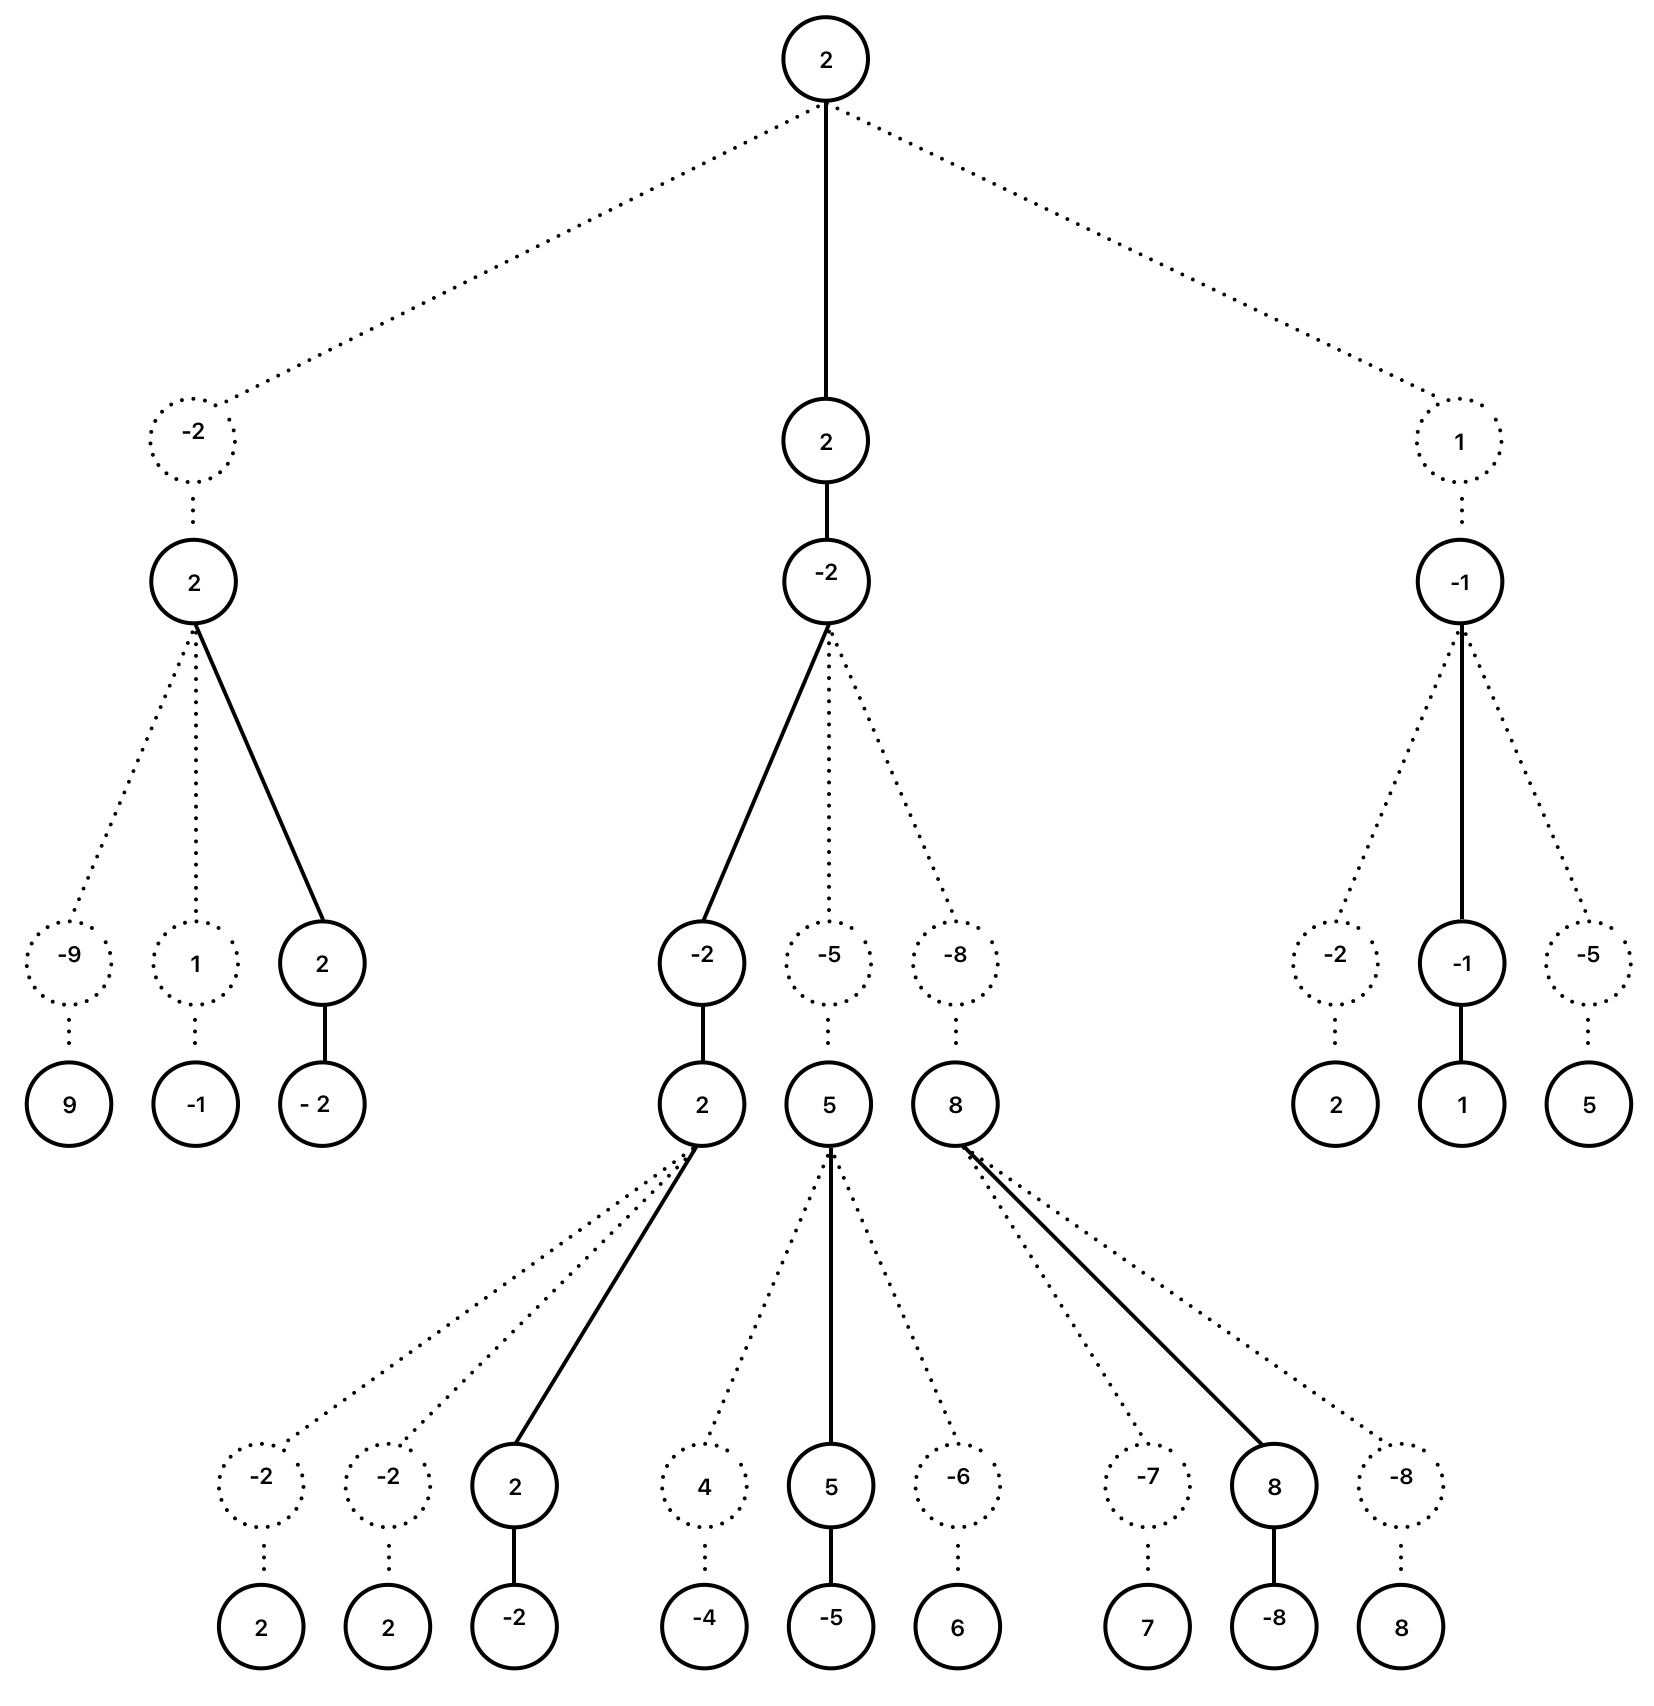



---
# **4 - Suchtiefe begrenzen**
---

---
## **4.1 - Werte der Evaluierungsfunktion**

Geben Sie die Werte der Evaluierungsfunktion für sechs verschiedene Spielzustände an (3 Endzustände, 3 Zwischenzustände).

$$
\\
$$

$$
\\
Eval(s) \ = \
3 \ X_2(s) \ + \ X_1(s) \ - \
\bigl ( 3 \ O_2(s) \ + \ O_1(s) \bigr )
\\
$$

$$
X_n = \text{number of rows, columns, or } \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{diagonals with exactly n X’s and no O’s} \\
$$

$$
\\
O_n = \text{number of rows, columns, or } \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{diagonals with exactly n O’s and no X’s} \\
\\
$$

$$ \\ $$

---

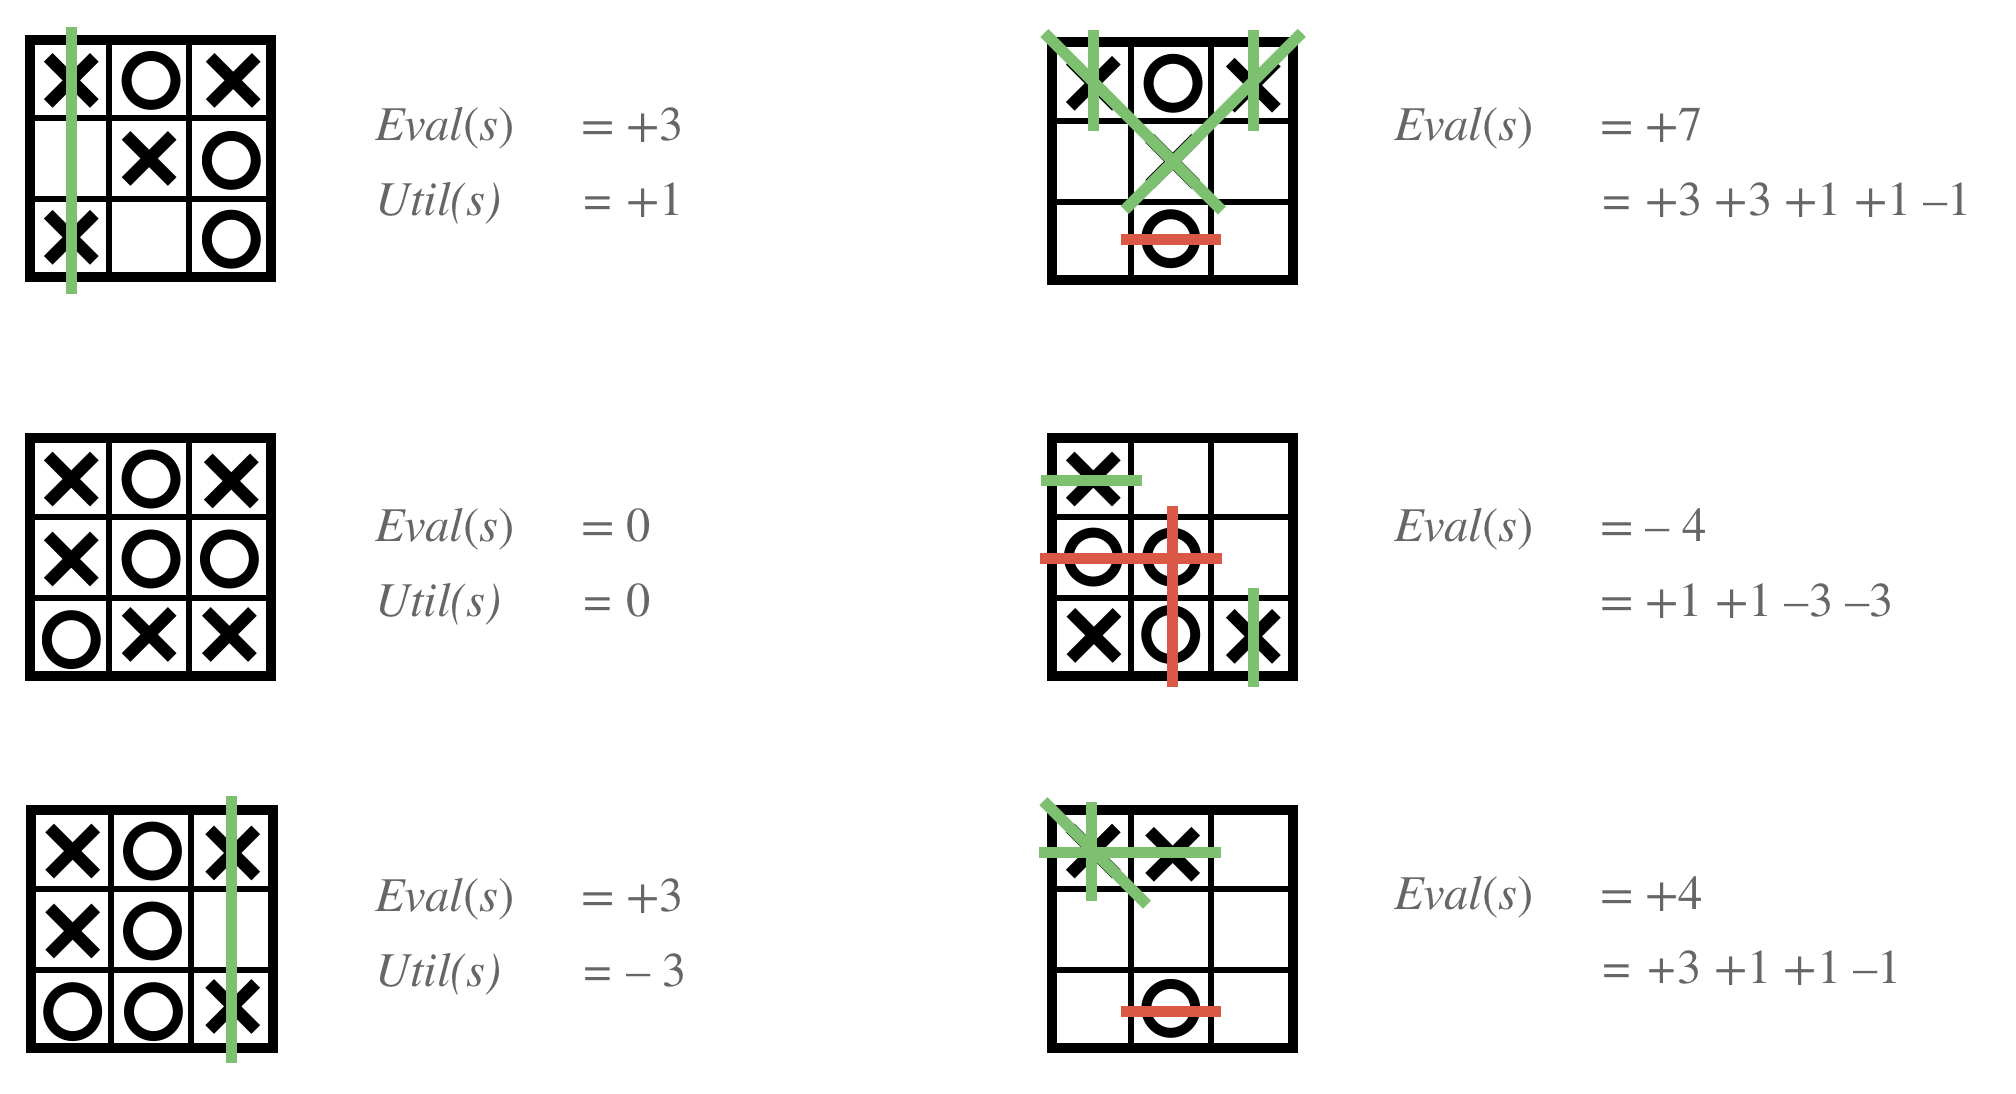

---
## **4.2 - Bewertung**

Begründen Sie, warum diese Evaluierungsfunktion im Zusammenhang mit Tic-Tac-Toe sinnvoll sein kann.

$$ \\ $$

---

---
$$ \\ $$

Mit der Evaluierungsfunktion werden Spiel-Zustände, die dem Sieg / Verlust näher kommen, besser bwz. schlechter bewertet. So ist ein Zustand mit 2 Spalten aus nur X und keine O nur ein Zug durch X vom Sieg entfernt - und wird entsprechend bewertet.

$$ \\ $$

---

---
# **5 - Minimax generalisiert**
---

---
$$ \\ $$

Die Spieler heißen 1, 2 und 3. Im Gegensatz zu Zwei-Personen-Nullsummenspielen liefert die Bewertungsfunktion nun Tripel
$(x_1, x_2, x_3)$
zurück, wobei $x_i$ der Wert für **Spieler i** ist. Allianzen zwischen Spielern sind nicht erlaubt.

$$ \\ $$

Vervollständigen Sie den Spielbaum, indem Sie alle inneren Knoten und den Wurzelknoten mit den entsprechenden Wert-Tripeln annotieren.

$$ \\ $$

---

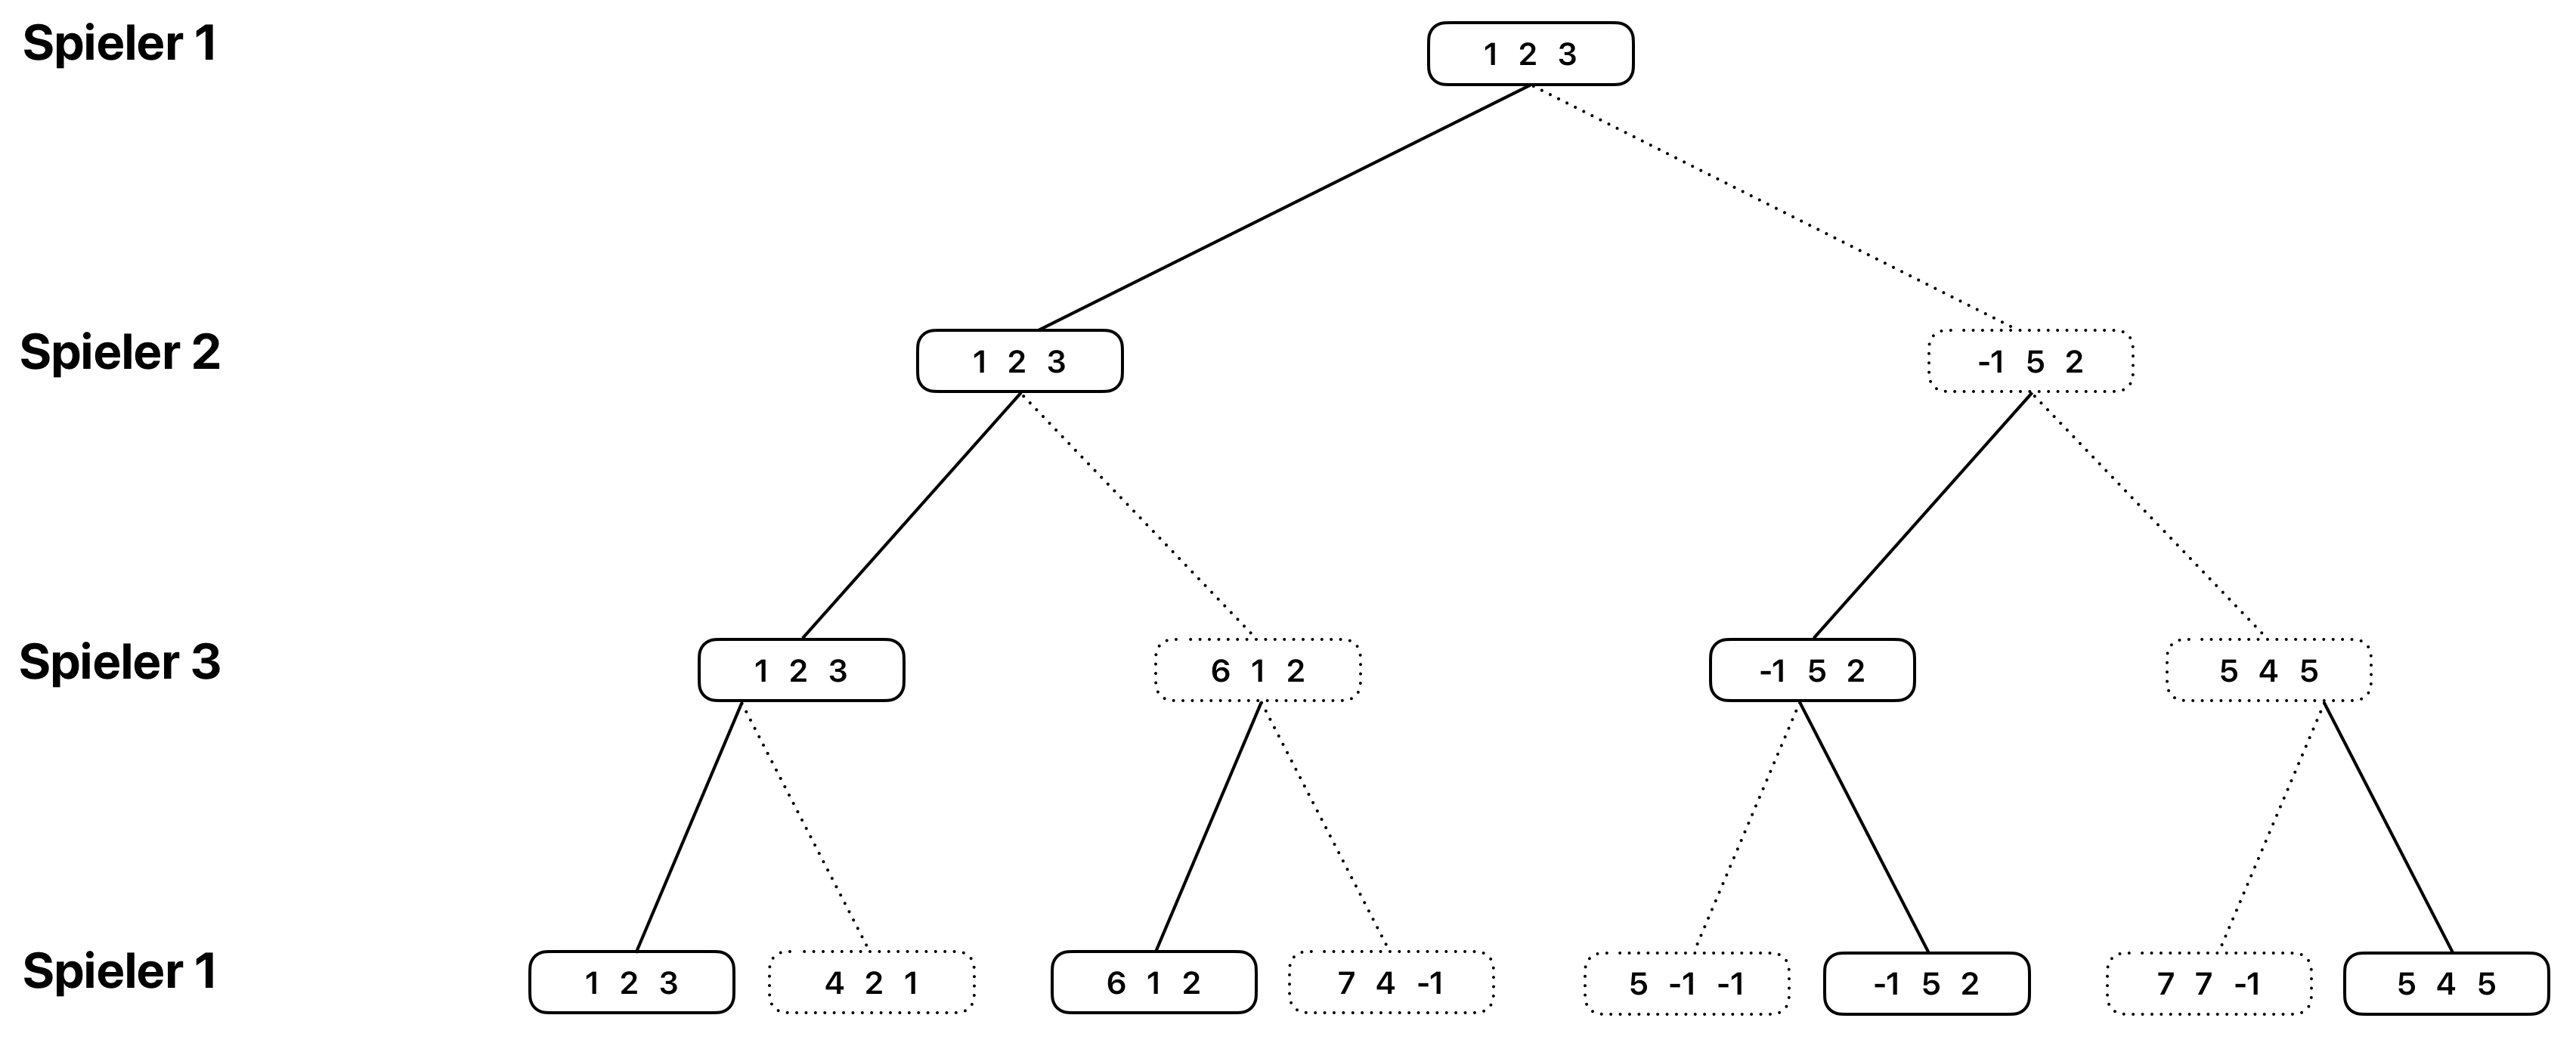

---